In [1]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/sales_data.csv')

In [3]:
df.shape

(369, 6)

In [4]:
df.head()

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0


In [8]:
df.isnull().sum()

date        0
product     0
category    0
price       0
quantity    0
revenue     0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [10]:
df['date'] = pd.to_datetime(df['date'])

In [11]:
total_quantity_sold = df['quantity'].sum()
print(f"Total quantity of products sold: {total_quantity_sold}")

Total quantity of products sold: 5300.0


In [12]:
highest_revenue_category = df.groupby('category')['revenue'].sum().idxmax()
highest_revenue = df.groupby('category')['revenue'].sum().max()
print(f"Category with highest revenue: {highest_revenue_category}")
print(f"Total revenue generated by {highest_revenue_category}: ${highest_revenue}")

Category with highest revenue: Electronics
Total revenue generated by Electronics: $509480.0


In [13]:
average_revenue_per_sale = df['revenue'].mean()
print(f"Average revenue per sale: ${average_revenue_per_sale:.2f}")


Average revenue per sale: $2050.49


In [15]:
df['quarter'] = df['date'].dt.quarter
quarterly_revenue = df.groupby('quarter')['revenue'].sum()

In [16]:
quarter_labels = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
quarterly_revenue.index = quarterly_revenue.index.map(quarter_labels)

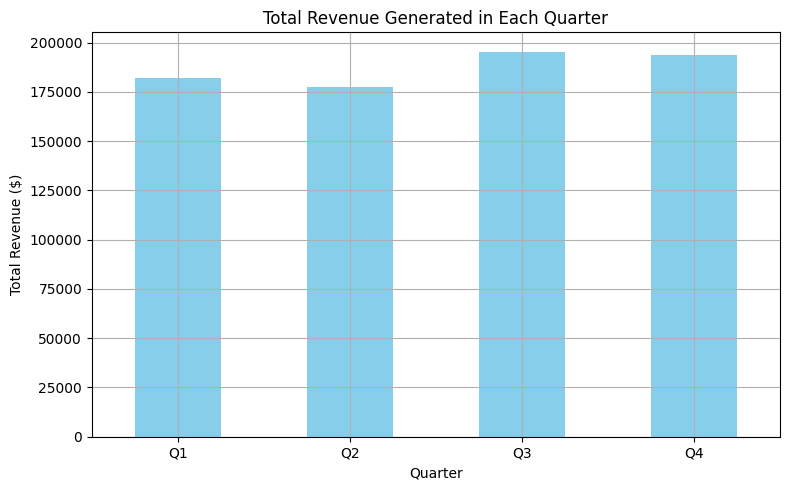

In [17]:
plt.figure(figsize=(8, 5))
quarterly_revenue.plot(kind='bar', color='skyblue')

plt.title('Total Revenue Generated in Each Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=0)
plt.grid(True)

plt.tight_layout()
plt.show()
